In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [3]:
# Read the file from present and future
df = pd.read_csv('wind_density_data-1976-2005.dat', skipinitialspace=True)
df_2030 = pd.read_csv('wind_density_data-2020-2049.dat', skipinitialspace=True)
df_2050 = pd.read_csv('wind_density_data-2040-2069.dat', skipinitialspace=True)
df_2080 = pd.read_csv('wind_density_data-2070-2099.dat', skipinitialspace=True)

In [5]:
# Get the name of the stations
lats = []
lons = []
stnames = []
stations = open('stations.txt', 'r')
for line in stations:
    aa = line.replace("\n", '').split(';')
    if (aa[0] != "#"):      
        lats.append(float(aa[3]))
        lons.append(float(aa[5]))
        stnames.append(aa[1].replace(',',"_"))

In [152]:
df2_sorted.head()

,station,month,type,perc_shf,perc_kmean,vmin,vmax,vmean,vstd,vrange,vskew,vkurtosis
0,71043__Norman_Wells_Ua__NT_YVQ,1,SHF-,66.01,78.82,0.02,6756.76,151.43,378.869,6756.73,6.808,64.307
1,71043__Norman_Wells_Ua__NT_YVQ,1,SHF-,66.01,21.18,2.76,67776.16,3329.83,5996.439,67773.40,5.246,41.494
4,71043__Norman_Wells_Ua__NT_YVQ,2,SHF-,57.47,77.55,0.04,4973.34,160.57,332.492,4973.30,5.220,42.257
5,71043__Norman_Wells_Ua__NT_YVQ,2,SHF-,57.47,22.45,0.45,73191.83,2285.39,4605.878,73191.38,6.852,77.890
9,71043__Norman_Wells_Ua__NT_YVQ,3,SHF-,50.08,80.11,0.16,6528.42,183.29,371.456,6528.26,5.577,55.227


In [153]:
df_2080_sorted.head()

,station,month,type,perc_shf,perc_kmean,vmin,vmax,vmean,vstd,vrange,vskew,vkurtosis
0,71043__Norman_Wells_Ua__NT_YVQ,1,SHF-,67.45,75.77,0.02,5546.93,145.42,335.953,5546.91,6.294,57.276
1,71043__Norman_Wells_Ua__NT_YVQ,1,SHF-,67.45,24.23,1.46,35985.71,3587.83,5367.930,35984.25,2.965,10.444
4,71043__Norman_Wells_Ua__NT_YVQ,2,SHF-,61.74,75.46,0.02,4080.55,167.91,348.932,4080.53,4.295,24.177
5,71043__Norman_Wells_Ua__NT_YVQ,2,SHF-,61.74,24.54,2.35,27129.70,3212.73,4033.520,27127.35,2.106,5.054
8,71043__Norman_Wells_Ua__NT_YVQ,3,SHF-,54.64,71.51,0.02,5500.43,207.55,410.244,5500.41,4.750,33.330


[ 1.33333333  2.33333333  3.33333333  4.33333333  5.33333333  6.33333333
  7.33333333  8.33333333  9.33333333 10.33333333 11.33333333 12.33333333]


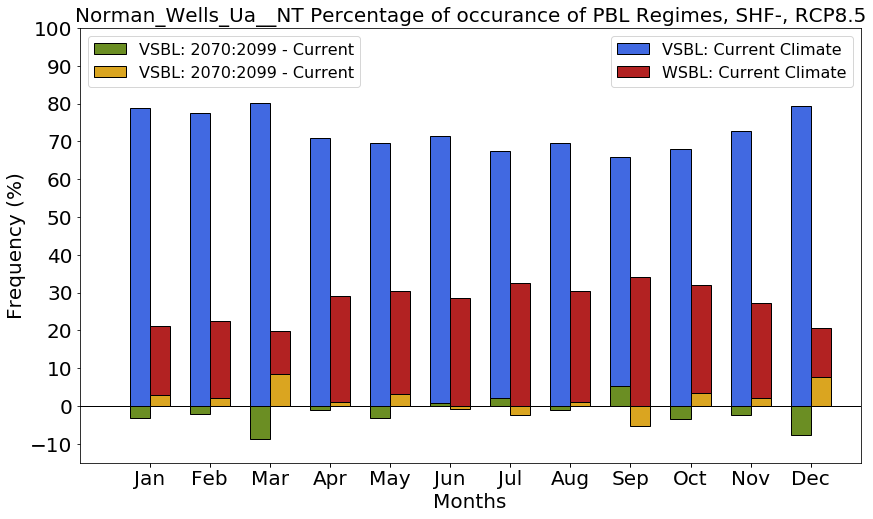

NameError: name 'sys' is not defined

In [144]:
# Plot for each station
for name in stnames:
    name_ = name
    
    # Filtering the dataframe
    df_ = df.loc[(df['station'] == name)]
    df_2080_ = df_2080.loc[(df_2080['station'] == name)]
    df_2050_ = df_2050.loc[(df_2050['station'] == name)]
    df_2030_ = df_2030.loc[(df_2030['station'] == name)]            
    
    # Plotting for SHF- and Sorting it, to separate between the two PBL regimes    
    
    df2_sorted = df_.loc[df_['type'] == 'SHF-'].sort_values(by=['month', 'vmean'])
    df_2080_sorted = df_2080_.loc[df_2080_['type'] == 'SHF-'].sort_values(by=['month', 'vmean'])
    df_2050_sorted = df_2050_.loc[df_2050_['type'] == 'SHF-'].sort_values(by=['month', 'vmean'])
    df_2030_sorted = df_2030_.loc[df_2030_['type'] == 'SHF-'].sort_values(by=['month', 'vmean'])
    
    
    perc_vsbl = df2_sorted['perc_kmean'][::2]
    perc_wsbl = df2_sorted['perc_kmean'][1::2]
    
    perc_vsbl_2080 = df_2080_sorted['perc_kmean'][::2]
    perc_vsbl_2080 = df_2080_sorted['perc_kmean'][1::2]
    
    value_vsbl = df2_sorted['vmean'][::2]
    value_wsbl = df2_sorted['vmean'][1::2]
        
    # Barplot with the 2 percentages
    
    # On the right side, climate projections
    barplot_perc(np.arange(1,13), perc_vsbl.values, perc_wsbl.values, perc_vsbl_2080.values, perc_wsbl_2080.values,
                'VSBL: Current Climate', 'WSBL: Current Climate', 'VSBL: 2070:2099 - Current', 'VSBL: 2070:2099 - Current',
                '{0} Percentage of occurance of PBL Regimes, {1}, RCP8.5'.format(name[7:-4], 'SHF-'),
                '{0}_perc_2080.png'.format(name))
    
    # Plot 2
    # Lineplot with the 2 values
    
    # On the right side, climate projections
    

In [ ]:
def lineplot_wp(xdata, ydata1, ydata2, ydata1_future, ydata2_future, 
                 label1, label2, label1_future, label2_future, title, fname, barWidth=0.5):

In [149]:
def barplot_perc(xdata, ydata1, ydata2, ydata1_future, ydata2_future, 
                 label1, label2, label1_future, label2_future, title, fname, barWidth=0.5):  
    
    fig = plt.figure(figsize=[14,8])
    x1 = xdata
    x2 = xdata + barWidth/1.5
    print(x2)
    
    ax1 = fig.add_subplot(111)
    
    plt.plot([0,13],[0,0], color='k', linewidth=1)
    
    # Create blue bars
    plt.bar(x1, ydata1, width = barWidth/1.5, color = 'royalblue', edgecolor = 'black', label=label1)
 
    # Create cyan bars
    plt.bar(x2, ydata2, width = barWidth/1.5, color = 'firebrick', edgecolor = 'black', label=label2)
    
    plt.ylim(-15,100)        
    plt.xlim(0,13)
    plt.xticks(xdata+barWidth/3, ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], fontsize=20)    
    plt.xlabel('Months', fontsize='20')
    
    ax1.set_yticks([], [])
    plt.legend(loc=1, fontsize=16)
    
    ax2 = fig.add_subplot(111, sharex=ax1, frameon=False, )
    plt.bar(x1, ydata1_future-ydata1, width = barWidth/1.5, color = 'olivedrab', edgecolor = 'black', label=label1_future)
    
    plt.bar(x2, ydata2_future-ydata2, width = barWidth/1.5, color = 'goldenrod', edgecolor = 'black', label=label2_future)
    plt.ylim(-15,100)
    plt.xlim(0,13)
    plt.setp(ax2.get_xticklabels(), visible=False)
    plt.yticks(np.arange(-10,101,10), fontsize=20)
    
    plt.title(title, fontsize=20)
    
    plt.ylabel('Frequency (%)', fontsize=20)
    plt.legend(loc=2, fontsize=16)
    plt.savefig(fname, pad_inches=0.0, bbox_inches='tight')   
    



In [31]:
df_.columns

Index(['station', 'month', 'type', 'perc_shf', 'perc_kmean', 'vmin', 'vmax',
       'vmean', 'vstd', 'vrange', 'vskew', 'vkurtosis'],
      dtype='object')

In [53]:
df2_sorted.head()

,station,month,type,perc_shf,perc_kmean,vmin,vmax,vmean,vstd,vrange,vskew,vkurtosis
529,00000_Sachs_Harbour,1,SHF-,79.57,62.48,0.01,30323.03,1580.47,2431.507,30323.02,3.660,20.254
528,00000_Sachs_Harbour,1,SHF-,79.57,37.52,240.83,115183.59,13020.48,13552.874,114942.77,2.717,10.424
532,00000_Sachs_Harbour,2,SHF-,77.68,64.89,0.02,24269.34,1508.39,2549.624,24269.32,3.598,17.265
533,00000_Sachs_Harbour,2,SHF-,77.68,35.11,154.10,63432.70,11028.31,10594.306,63278.61,1.781,3.271
536,00000_Sachs_Harbour,3,SHF-,67.11,65.53,0.02,25126.26,1233.91,2011.778,25126.24,4.181,26.182


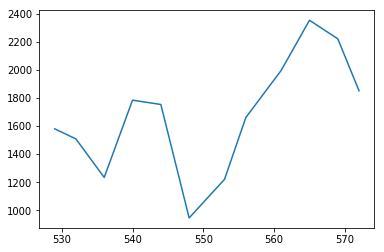

In [50]:
df2_sorted['vmean'][0::2].plot()

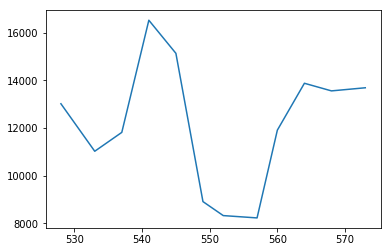

In [52]:
df2_sorted['vmean'][1::2].plot()